In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score



In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [ ]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df.tail()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [ ]:
# OUTLIERS DETECTION("df": is a variable for data set)
def outlier_detector(ft):
  global df
  q1= df[ft].quantile(0.25)
  q2= df[ft].quantile(0.75)
  IQR=q2-q1
  lower_bound=q1-1.5*IQR
  upper_bound=q2+1.5*IQR
  ls = df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
  return ls



In [ ]:
#OUTLIERS COMPLET INDEX LIST
index_list=[]
for ft in ['amount','longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff','no_of_passenger']:
  index_list.extend(outlier_detector(ft))
print('index_list : ',index_list)

index_list :  [31, 32, 35, 54, 56, 77, 105, 112, 118, 132, 134, 147, 166, 171, 188, 194, 198, 204, 220, 232, 256, 286, 301, 305, 309, 314, 315, 320, 329, 330, 333, 344, 345, 347, 398, 399, 404, 426, 429, 437, 443, 449, 459, 460, 471, 475, 489, 499, 510, 511, 537, 538, 539, 552, 554, 582, 588, 622, 639, 649, 664, 665, 671, 690, 704, 709, 717, 726, 736, 737, 758, 765, 774, 787, 790, 791, 798, 801, 803, 809, 812, 832, 844, 846, 850, 857, 914, 927, 928, 962, 966, 979, 993, 997, 1011, 1014, 1022, 1041, 1051, 1056, 1075, 1091, 1102, 1121, 1128, 1137, 1151, 1163, 1176, 1181, 1185, 1194, 1220, 1232, 1244, 1282, 1288, 1299, 1312, 1335, 1348, 1349, 1350, 1368, 1387, 1388, 1401, 1404, 1425, 1427, 1431, 1441, 1445, 1477, 1483, 1486, 1487, 1493, 1494, 1535, 1557, 1568, 1578, 1583, 1587, 1607, 1612, 1619, 1623, 1628, 1643, 1645, 1697, 1709, 1722, 1728, 1739, 1741, 1751, 1762, 1764, 1791, 1796, 1802, 1842, 1849, 1868, 1879, 1885, 1904, 1930, 1940, 1949, 1955, 1974, 1979, 1983, 1995, 2009, 2013, 2016,

In [ ]:
#DEFINE A FUNCTION TO DELETE THE OUTLIERS
def remove(df,ls):
  df=df.drop(ls)
  return df

In [ ]:
df = remove(df,index_list)

In [ ]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1


In [ ]:
#Now data set is free from outliers and now removing duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# we will drop date/time column as it is not userfull for our data analysis
lables=['unique_id','date_time_of_pickup']
df=df.drop(lables,axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37795 entries, 1 to 49999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                37795 non-null  float64
 1   longitude_of_pickup   37795 non-null  float64
 2   latitude_of_pickup    37795 non-null  float64
 3   longitude_of_dropoff  37795 non-null  float64
 4   latitude_of_dropoff   37795 non-null  float64
 5   no_of_passenger       37795 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.0 MB


In [ ]:
#here our traget feature is 'amount'
x=df.drop(['amount'],axis=1)
y=df['amount']

In [ ]:
x

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
1,-74.016048,40.711303,-73.979268,40.782004,1
2,-73.982738,40.761270,-73.991242,40.750562,2
3,-73.987130,40.733143,-73.991567,40.758092,1
4,-73.968095,40.768008,-73.956655,40.783762,1
5,-74.000964,40.731630,-73.972892,40.758233,1
...,...,...,...,...,...
49995,-73.999973,40.748531,-74.016899,40.705993,1
49996,-73.984756,40.768211,-73.987366,40.760597,1
49997,-74.002698,40.739428,-73.998108,40.759483,1
49998,-73.946062,40.777567,-73.953450,40.779687,2


In [ ]:
y

1        16.9
2         5.7
3         7.7
4         5.3
5        12.1
         ... 
49995    15.0
49996     7.5
49997     6.9
49998     4.5
49999    10.9
Name: amount, Length: 37795, dtype: float64

In [ ]:
# Spliting into training set and testing set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(30236, 5)

In [ ]:
y_train.shape

(30236,)

LINEAR REGRESSION MODEL

In [ ]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [ ]:
model1.predict(x_test)

array([8.48641095, 8.97223639, 8.64787304, ..., 9.10419385, 9.37975629,
       8.91429106])

LINEAR REGRESSION EVALUTION

In [ ]:
model1.score(x_train,y_train)

0.021153752132498038

In [ ]:
model1.score(x_test,y_test)

0.021153099179289758

KNN MODEL

In [ ]:
model2=KNeighborsRegressor()
model2.fit(x_train,y_train)

KNeighborsRegressor()

KNN EVALUTION

In [ ]:
model2.score(x_train,y_train)

0.7788865302238317

In [ ]:
model2.score(x_test,y_test)

0.6372624741939761

GRADIENT BOOST REGRESSION

In [ ]:
model3=GradientBoostingRegressor()
model3.fit(x_train,y_train)

GradientBoostingRegressor()

GRADIENT BOOST REGRESSION EVALUTION

In [ ]:
model3.score(x_train,y_train)

0.5603832693058555

In [ ]:
model3.score(x_test,y_test)

0.5220885651254774

In [ ]:
#correlations between columns
corr1 = df.corr()
corr1

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,-0.071564,-0.096823,0.007480,-0.096864,0.016455
longitude_of_pickup,-0.071564,1.000000,0.676612,0.404582,0.344985,-0.025638
latitude_of_pickup,-0.096823,0.676612,1.000000,0.316545,0.513831,-0.018305
longitude_of_dropoff,0.007480,0.404582,0.316545,1.000000,0.609004,-0.016883
latitude_of_dropoff,-0.096864,0.344985,0.513831,0.609004,1.000000,-0.005585
no_of_passenger,0.016455,-0.025638,-0.018305,-0.016883,-0.005585,1.000000


<AxesSubplot:>

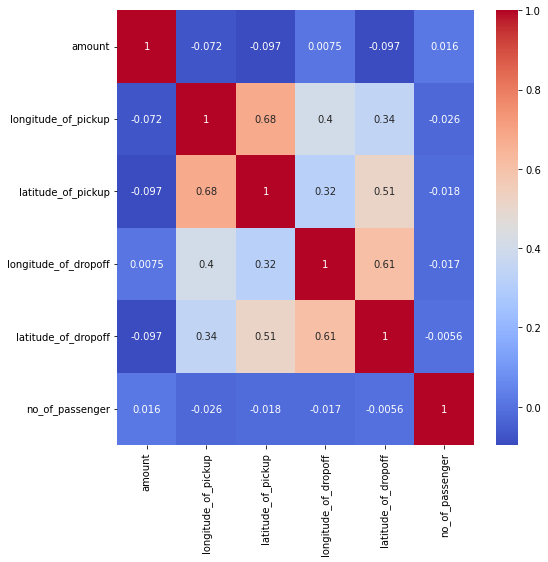

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(corr1,annot=True,cmap="coolwarm")

----------------------------------------------------------------------------------------

HERE WE CAN SEE THAT ACCURACY OF OUR ODEL IS NOT THAT GOOD AS CORRELATION BETWEEN LATTIUDE OF PICKUP AND DROP AND LONGITUDE OF PICKUP AND DROP DOES NOT HAVE GOOD CORRELATION

SO LET US CHECK FOR DELTA LONGITUDE AND DELTA LATITUDE

In [ ]:
df['longitude_of_pickup']=abs(df['longitude_of_pickup']-df['longitude_of_dropoff'])
df['latitude_of_pickup']=abs(df['latitude_of_pickup']-df['latitude_of_dropoff'])
column=['longitude_of_dropoff','latitude_of_dropoff']
df.drop(column,axis=1,inplace=True)

In [ ]:
df2 = df.rename(columns = {'longitude_of_pickup': 'Delta_longitude' , 'latitude_of_pickup': 'Delta_latitude'})

In [ ]:
df2.head()

,amount,Delta_longitude,Delta_latitude,no_of_passenger
1,16.9,0.036780,0.070701,1
2,5.7,0.008504,0.010708,2
3,7.7,0.004437,0.024949,1
4,5.3,0.011440,0.015754,1
5,12.1,0.028072,0.026603,1


In [ ]:
df2.describe()

,amount,Delta_longitude,Delta_latitude,no_of_passenger
count,37795.000000,37795.000000,37795.000000,37795.000000
mean,8.713241,0.014161,0.016940,1.258950
std,3.932530,0.011498,0.014147,0.546573
min,-2.500000,0.000000,0.000000,0.000000
25%,5.700000,0.005603,0.006563,1.000000
50%,7.700000,0.011392,0.012948,1.000000
75%,10.900000,0.019784,0.023505,1.000000
max,22.100000,0.082855,0.098895,3.000000


In [ ]:
#correlations between columns
corr2 = df2.corr()
corr2

,amount,Delta_longitude,Delta_latitude,no_of_passenger
amount,1.000000,0.599494,0.725793,0.016455
Delta_longitude,0.599494,1.000000,0.426946,-0.005209
Delta_latitude,0.725793,0.426946,1.000000,0.009479
no_of_passenger,0.016455,-0.005209,0.009479,1.000000


<AxesSubplot:>

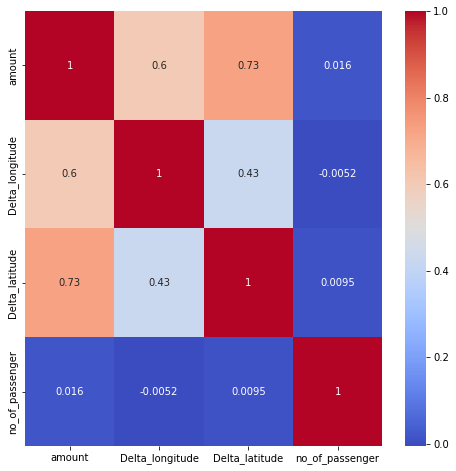

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(corr2,annot=True,cmap="coolwarm")

In [ ]:
# Here our target feature is 'amount'
x_n=df2.drop(['amount'],axis=1)
y_n=df2['amount']

In [ ]:
x_n_train,x_n_test,y_n_train,y_n_test=train_test_split(x_n,y_n,test_size=0.2)

LINEAR REGRESSION

In [ ]:
model4=LinearRegression()
model4.fit(x_n_train,y_n_train)

LinearRegression()

LINEAR REGRESSION EVALUTION

In [ ]:
model4.score(x_n_train,y_n_train)

0.6286049409133593

In [ ]:
model4.score(x_n_test,y_n_test)

0.6330627427545099

KNN MODEL

In [ ]:
model5=KNeighborsRegressor()
model5.fit(x_n_train,y_n_train)

KNeighborsRegressor()

KNN EVALUTION

In [ ]:
model5.score(x_n_train,y_n_train)

0.7498953296852142

In [ ]:
model5.score(x_n_test,y_n_test)

0.6360229259274642

GRADIENT BOOST REGRESSION

In [ ]:
model6=GradientBoostingRegressor()
model6.fit(x_n_train,y_n_train)

GradientBoostingRegressor()

GRADIENT BOOST REGRESSION EVALUTION

In [ ]:
model6.score(x_n_train,y_n_train)

0.6978453050062949

In [ ]:
model6.score(x_n_test,y_n_test)

0.6855678584419119

NOW CORRELATION IS BETTER AND HENCE ALL MODELS HAVE BETTER SCORE THAN BEFORE.